<a href="https://colab.research.google.com/github/christophergaughan/PyTorch/blob/main/PyTorch_Workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch Workflow

## End-to-End Workflow
* Ground Truth notebook - https://github.com/mrdbourke/pytorch-deep-learning/blob/main/01_pytorch_workflow.ipynb
* Book - https://www.learnpytorch.io/
* Discussion -  https://github.com/mrdbourke/pytorch-deep-learning/discussions (Got to Discussions button)

In [1]:
what_were_discussing = {1: "data (prepare and load)",
                        2: "build model",
                        3: "fitting the model to the data (training)",
                        4: "making predictions and evaluating model (inference",
                        5: "saving and loading the model",
                        6: "put it all together"}

In [2]:
what_were_discussing

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to the data (training)',
 4: 'making predictions and evaluating model (inference',
 5: 'saving and loading the model',
 6: 'put it all together'}

In [3]:
from IPython.display import Image, display


In [4]:
image_url = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcToOXjYFty55uujoIAle6t9G5y3dobFplq8mw&s"
display(Image(url=image_url, width=650))

In [5]:
import torch
from torch import nn # nn contains all of PyTotches building blocks for neural networks
import matplotlib.pyplot as plt

torch.__version__

'2.5.1+cu121'

| **Workload Level** | **Memory Usage (MB)** | **Memory Usage (GB)** | **Example Use Cases**                            |
|---------------------|-----------------------|-----------------------|--------------------------------------------------|
| **Low**            | < 500 MB             | < 0.5 GB             | Small datasets, fine-tuning small models (e.g., BERT-base), simple inference tasks. |
| **Moderate**       | 500 MB – 4 GB        | 0.5 GB – 4 GB        | Medium datasets, training mid-sized models (e.g., ResNet-50, BERT-large), inference with larger models. |
| **High**           | > 4 GB               | > 4 GB               | Large datasets, training large-scale models (e.g., GPT-3, Vision Transformers), distributed training. |

Also, there as in anexcellent video concerning how Neural Netoworks actually work:
https://www.3blue1brown.com/lessons/neural-networks

In [6]:
# Create known parameters
weight = 0.7
bias = 0.3

# Data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10], len(X), len(y)


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

### Splitting data into training and test sets


In [7]:
# Create a train test split
train_split  = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)


(40, 40, 10, 10)

## Visualize Data

In [8]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
    """
    Plots training data, test data, and compares predictions.
    """
    import matplotlib.pyplot as plt

    # Fix the figure size parameter
    plt.figure(figsize=(10, 7))

    # Training data
    if train_data is not None and train_labels is not None:
        plt.scatter(train_data, train_labels, c='b', s=4, label='Training data')

    # Testing data
    if test_data is not None and test_labels is not None:
        plt.scatter(test_data, test_labels, c='g', s=4, label='Testing data')

    # Predictions
    if predictions is not None:
        plt.scatter(test_data, predictions, c='r', s=4, label='Predictions')

    plt.legend(prop={'size': 14})
    plt.xlabel("Data")
    plt.ylabel("Labels")
    plt.title("Predictions vs. Actual")
    plt.show()



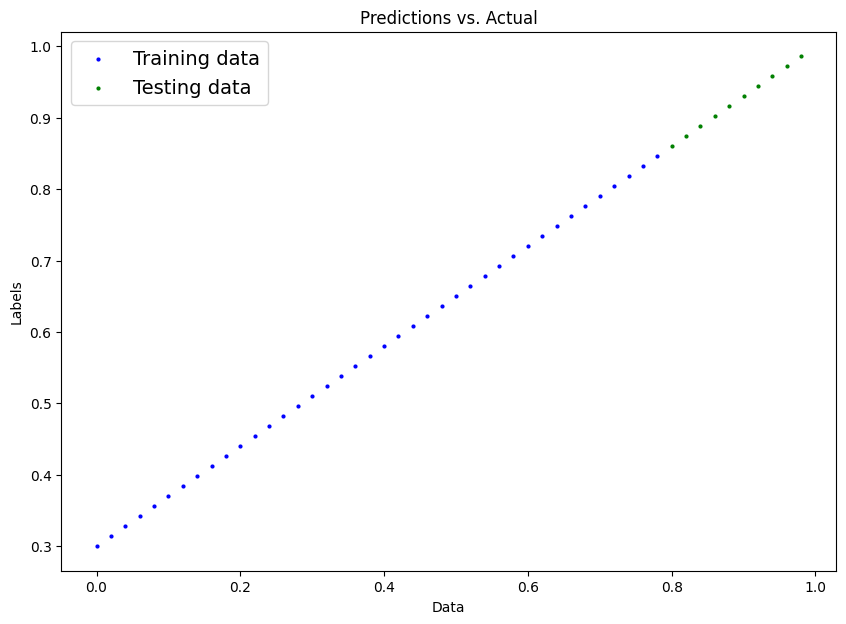

In [9]:
plot_predictions();

## First PyTorch Model

We will make a linear regression model

Almost everything in PyTorch inherits from `nn.Module`, so we are making a class that inherits it

`torch.nn.parameter.Parameter(data=None, requires_grad=True)`

A kind of Tensor that is to be considered a module parameter.

Parameters are Tensor subclasses, that have a very special property when used with Module s - when they’re assigned as Module attributes they are automatically added to the list of its parameters, and will appear e.g. in parameters() iterator. Assigning a Tensor doesn’t have such effect. This is because one might want to cache some temporary state, like last hidden state of the RNN, in the model. If there was no such class as Parameter, these temporaries would get registered too.

Parameters
* data (Tensor) – parameter tensor.

* requires_grad (bool, optional) – if the parameter requires gradient. Note that the torch.no_grad() context does NOT affect the default behavior of Parameter creation–the Parameter will still have requires_grad=True in no_grad mode. See Locally disabling gradient computation for more details. Default: True



## What our model does
* start with the random values
* Look at the training data and adjust the random values to better represent (or get closer to) the ideal values (the weights and the bias values we used to create thee data.

### How does it do this??
1. Gradient descent
2. Backpropagation

### **Gradient Descent in Linear Regression**

Gradient Descent is an optimization algorithm used to minimize the **cost function** in linear regression and other machine learning algorithms. The goal is to iteratively adjust the model's parameters to reduce the error between the predicted and actual values.

---

#### **Steps in Gradient Descent**

1. **Initialize Parameters**:
   Start with initial values for the model parameters \( $\beta_0, \beta_1, \ldots, \beta_n$ \), often set to zero or small random values.

2. **Compute Predictions**:
   Use the current parameters to predict the output ($( Y_{\text{pred}}$)) based on the input features $(( X ))$.

3. **Calculate the Cost Function**:
   The cost function $( J(\beta) )$ measures the error between the predicted values and the actual values. For linear regression, the cost function is the (often but not always) Mean Squared Error (MSE):

   $$
   J(\beta) = \frac{1}{2m} \sum_{i=1}^{m} \left( Y_{\text{pred}}^{(i)} - Y^{(i)} \right)^2
   $$

   Where:
   
   - $m$: Number of data points.
   - $Y_{{pred}}$: Predicted values.
   - $Y$: Actual values.
   

4. **Compute the Gradient**:
   The gradient is the partial derivative of the cost function with respect to each parameter $( \beta_j )$. It represents the direction and rate of change of the cost function:

   $$
   \frac{\partial J}{\partial \beta_j} = \frac{1}{m} \sum_{i=1}^{m} \left( Y_{\text{pred}}^{(i)} - Y^{(i)} \right) X_j^{(i)}
   $$

5. **Update Parameters**:
   Adjust the parameters by moving them in the direction opposite to the gradient (to minimize the cost function). The update rule is:

   $$
   \beta_j = \beta_j - \alpha \cdot \frac{\partial J}{\partial \beta_j}
   $$

   Where $( \alpha )$ is the learning rate, controlling the step size.

6. **Repeat**:
   Iterate the steps until the parameters converge (i.e., the cost function no longer decreases significantly) or a maximum number of iterations is reached.

---

#### **Function of Gradient Descent in Linear Regression**

1. **Minimizes the Cost Function**:
   Gradient Descent adjusts the model parameters to minimize the error between predicted and actual values.

2. **Optimizes Parameters**:
   It finds the optimal values of $( \beta_0, \beta_1, \ldots, \beta_n )$, resulting in the best-fit line for the data.

3. **Handles Large Datasets**:
   Gradient Descent is efficient, especially with stochastic or mini-batch variants.

---

#### **Key Considerations**

- **Learning Rate $( \alpha )$**:
  - If $( \alpha )$ is too small, convergence will be slow.
  - If $( \alpha )$ is too large, the algorithm may overshoot the minimum or diverge.

- **Global Minimum**:
  - For linear regression, the cost function is convex, so Gradient Descent always converges to the global minimum.

---

#### **Equation Recap**

- Cost Function:
  $$
  J(\beta) = \frac{1}{2m} \sum_{i=1}^{m} \left( Y_{\text{pred}}^{(i)} - Y^{(i)} \right)^2
  $$

- Gradient:
  $$
  \frac{\partial J}{\partial \beta_j} = \frac{1}{m} \sum_{i=1}^{m} \left( Y_{\text{pred}}^{(i)} - Y^{(i)} \right) X_j^{(i)}
  $$

- Update Rule:
  $$
  \beta_j = \beta_j - \alpha \cdot \frac{\partial J}{\partial \beta_j}
  $$

---

Gradient Descent is an essential method for finding optimal parameters in linear regression, ensuring that the model learns effectively from the data.

**Here is an excellent video to prime you on *Gradient Descent* in Neural Networks**
https://www.3blue1brown.com/lessons/gradient-descent


### Note we start with random values

In [10]:
# Create linear regression model class
from torch import nn
import torch

class LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        # Initialize the model parameters
        self.weights = nn.Parameter(torch.randn(1,  # Starting with random weights
                                                requires_grad=True,  # Parameters are updated via gradient descent
                                                dtype=torch.float))  # Common dtype for PyTorch
        self.bias = nn.Parameter(torch.randn(1,  # Start with random bias
                                             requires_grad=True,
                                             dtype=torch.float))

    # Forward method defines the computation of the model
    def forward(self, x: torch.Tensor) -> torch.Tensor:  # x is the input data
        return self.weights * x + self.bias  # Linear regression formula


### Note the above `nn.Module1`-> This contains all the bilding blocks for neural networks

### **PyTorch Model Building Essentials**

PyTorch has four (give or take) essential modules you can use to create almost any kind of neural network you can imagine.

They are `torch.nn`, `torch.optim`, `torch.utils.data.Dataset`, and `torch.utils.data.DataLoader`. For now, we'll focus on the first two and get to the other two later (though you may be able to guess what they do).

| **PyTorch Module**     | **What Does It Do?**                                                                                                               |
|-------------------------|-----------------------------------------------------------------------------------------------------------------------------------|
| **`torch.nn`**           | Contains all of the building blocks for computational graphs (essentially a series of computations executed in a particular way). |
| **`torch.nn.Parameter`** | Stores tensors that can be used with `nn.Module`. If `requires_grad=True`, gradients (used for updating model parameters via gradient descent) are calculated automatically. This is often referred to as "autograd". |
| **`torch.nn.Module`**    | The base class for all neural network modules; all the building blocks for neural networks are subclasses. If you're building a neural network in PyTorch, your models should subclass `nn.Module`. Requires a `forward()` method to be implemented. |
| **`torch.optim`**        | Contains various optimization algorithms (these tell the model parameters stored in `nn.Parameter` how to best change to improve gradient descent and in turn reduce the loss). |
| **`def forward()`**      | All `nn.Module` subclasses require a `forward()` method; this defines the computation that will take place on the data passed to the particular `nn.Module` (e.g., the linear regression formula above). |


docs:
https://pytorch.org/docs/stable/nn.html#module-torch.nn.modules.module

PyTorch Cheat-Sheet:
https://pytorch.org/tutorials/beginner/ptcheat.html#pytorch-cheat-sheet



## Checking the contents of a PyTorch model
Now we've got these out of the way, let's create a model instance with the class we've made and check its parameters using `.parameters()`.
*We can check out out models parameters using this function*

In [11]:
torch.manual_seed(42)

# Create an instance of the model (this is the subclass of the `nn.Module`
model_0 = LinearRegression()

model_0

LinearRegression()

In [12]:
# let's check out the parameters as a list- this gives you complete information
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

### Other ways of doing the same thing

In [13]:
# could also use Numpy in the following way
import numpy as np

# Convert model parameters to NumPy arrays
param_list = [param.detach().numpy() for param in model_0.parameters()]

# Print the parameters
for i, param in enumerate(param_list):
    print(f"Parameter {i}: {param}")


Parameter 0: [0.33669037]
Parameter 1: [0.1288094]


* Why `detach()`?

    * The `detach()` method removes the parameter from PyTorch’s computation graph, ensuring no gradient tracking.
  
* Why use `.numpy()`?

    * Converts the PyTorch tensor into a NumPy array.


In [14]:
# Another way to convert to Python Lists
param_list = [param.detach().tolist() for param in model_0.parameters()]

# Print the parameters
for i, param in enumerate(param_list):
    print(f"Parameter {i}: {param}")


Parameter 0: [0.33669036626815796]
Parameter 1: [0.12880940735340118]


In [15]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [16]:
weight, bias


(0.7, 0.3)

### Note we are trying to train our model so we get these 'ideal' values

Notice how the values for `weights` and `bias` from `model_0.state_dict()` come out as random float tensors?

This is because we initialized them above using `torch.randn()`.

Essentially we want to start from random parameters and get the model to update them towards parameters that fit our data best (the hardcoded `weight` and `bias` values we set when creating our straight line data).

Because our model starts with random values, right now it will likely have poor predictive power.

### Making predictions using `torch.inference_mode()`
To check this we can pass it the test data `X_test` to see how closely it predicts `y_test`.

When we pass data to our model, it'll go through the model's `forward()` method and produce a result using the computation we've defined.

### Let's make some predictions.

In [17]:
# Make predictions with model
with torch.inference_mode():
    y_preds = model_0(X_test)


# Note: in older PyTorch code you might also see torch.no_grad()
# with torch.no_grad():
# y_preds = model_0(X_test)
# y_preds

### **How We Are Arriving at Our Result in This Case**

When training a linear regression model in PyTorch, the process involves starting with random parameters and iteratively adjusting them to minimize the loss function. Here’s how it works step-by-step:

---

#### **1. Starting with Random Numbers**
- The model parameters (weights \(w\) and bias \(b\)) are initialized with random values:
  ```python
  self.weights = nn.Parameter(torch.randn(1, requires_grad=True))
  self.bias = nn.Parameter(torch.randn(1, requires_grad=True))


### **Mathematical Derivation of Linear Regression**

Linear regression is based on the principle of minimizing the error between the predicted outputs and the true outputs. Below, we derive the key equations step by step.

---

#### **1. Linear Model**
The equation for a simple linear regression model is:
$$
[
Y_{\text{pred}} = w \cdot X + b
]
$$
Where:
- $( Y_{\text{pred}} )$: Predicted value.
- $( w )$: Weight (slope of the line).
- $( X )$: Input feature.
- $( b )$: Bias (intercept).

---

#### **2. Cost Function**
To measure how well the model fits the data, we use the **Mean Squared Error (MSE)** as the cost function:
$$[
J(w, b) = \frac{1}{N} \sum_{i=1}^N \left( Y_{\text{true},i} - Y_{\text{pred},i} \right)^2
]
$$
Where:
- $( J(w, b) )$: Cost function.
- $( N )$: Number of data points.
- $( Y_{\text{true}} )$: True value.
- $( Y_{\text{pred}} )$: Predicted value.

---

#### **3. Gradient Calculation**
The model parameters $( w, b )$ are updated by calculating the gradient of the cost function with respect to these parameters. This involves taking partial derivatives:

1. Gradient with respect to $( w )$:
$[
\frac{\partial J}{\partial w} = -\frac{2}{N} \sum_{i=1}^N \left( Y_{\text{true},i} - Y_{\text{pred},i} \right) X_i
]$

2. Gradient with respect to $( b )$:
$[
\frac{\partial J}{\partial b} = -\frac{2}{N} \sum_{i=1}^N \left( Y_{\text{true},i} - Y_{\text{pred},i} \right)
]$

---

#### **4. Gradient Descent Update Rule**
Using these gradients, the model parameters are updated iteratively:
$[
w = w - \alpha \cdot \frac{\partial J}{\partial w}
]$
$[
b = b - \alpha \cdot \frac{\partial J}{\partial b}
]$
Where:
- $( \alpha )$: Learning rate, controlling the size of each update step.

---

#### **5. Final Linear Regression Formula**
After training, the model learns the best-fit parameters $( w, b )$ to minimize the cost function. The final prediction is computed as:
$[
Y_{\text{pred}} = w \cdot X + b
]$

---

### **Key Takeaways**
1. The cost function quantifies the error between predicted and true values.
2. Gradients guide how to update $( w )$ and $( b )$ to reduce the cost function.
3. Gradient descent ensures the model converges to the optimal parameters for a best-fit line.



### Making prediciton using `torch.inference_mode()`
To check our model's predictive power, let's see how well it predicts `Y_test` based on `X_test`
When we pass data through the model, it's going to run thrugh the `forward()` method

In [18]:
print(f'X_test is: {X_test}')
print(f'y_test is: {y_test}')

X_test is: tensor([[0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800]])
y_test is: tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])


In [19]:
with torch.inference_mode():
    y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

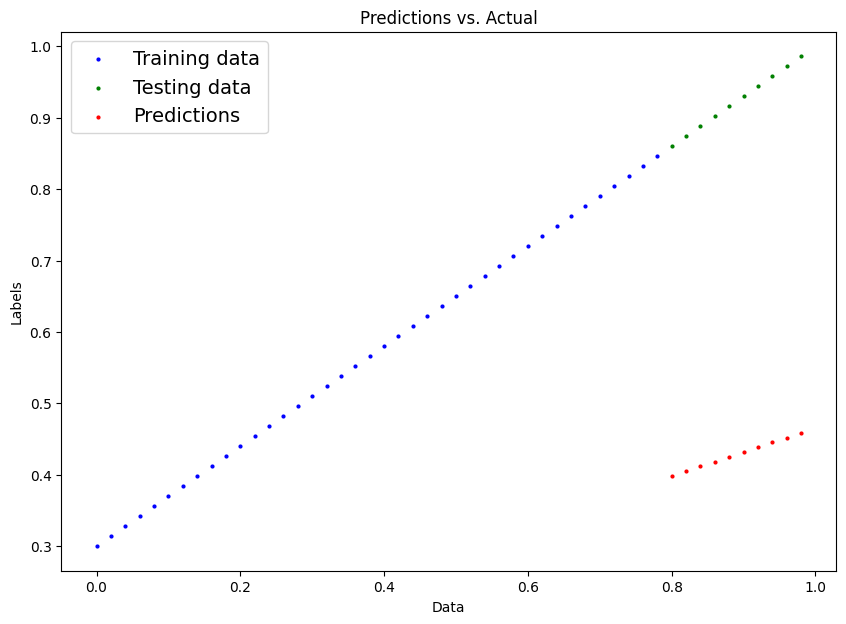

In [20]:
plot_predictions(predictions=y_preds)

#### So we see that the predicted values are pretty far off. What's going on here?

## Train model

The whole idea of training is for a model to move from *unknown* parameters (these may start out as random numbers) to some *known* parameters.

This is what goes on as we **train** our model. When we train our model, the weights and biases are altered such that the loss function is minimized. Thus we get a better representation of the predicted values as the model learns.

One way to represent how well the model is learning is to look at the loss function.

### Loss Function in Linear Regression

In linear regression, the predicted value for the $i$-th sample, $\hat{y}^{(i)}$, is computed as:

$$
[
\hat{y}^{(i)} = w_0 + w_1 x_1^{(i)} + w_2 x_2^{(i)} + \dots + w_p x_p^{(i)} = w_0 + \sum_{j=1}^p w_j x_j^{(i)}
]
$$

where:

- $w_0$ is the bias (intercept) term,
- $w_j$ are the weights for each feature,
- $x_j^{(i)}$ is the $j$-th feature of the $i$-th sample,
- $p$ is the number of features.

#### Vectorized Form

Using vector notation, this becomes:

$[
\hat{y}^{(i)} = \mathbf{w}^\top \mathbf{x}^{(i)}
]$

where:

$[
\mathbf{w} = \begin{bmatrix} w_0 \\ w_1 \\ \vdots \\ w_p \end{bmatrix}, \quad \mathbf{x}^{(i)} = \begin{bmatrix} 1 \\ x_1^{(i)} \\ \vdots \\ x_p^{(i)} \end{bmatrix}
]$

#### Mean Squared Error (MSE)

The Mean Squared Error (MSE) is the most common loss function in linear regression. It is defined as:

$[
J(\mathbf{w}) = \frac{1}{n} \sum_{i=1}^n \left( y^{(i)} - \hat{y}^{(i)} \right)^2
]$

Substituting $\hat{y}^{(i)} = \mathbf{w}^\top \mathbf{x}^{(i)}$, we get:

$[
J(\mathbf{w}) = \frac{1}{n} \sum_{i=1}^n \left( y^{(i)} - \mathbf{w}^\top \mathbf{x}^{(i)} \right)^2
]$

where:

- $n$ is the number of samples,
- $y^{(i)}$ is the true target value for the $i$-th sample,
- $\hat{y}^{(i)}$ is the predicted value.

#### Gradient Computation

To minimize the loss function, we compute the gradient of $J(\mathbf{w})$ with respect to $\mathbf{w}$:

$[
\nabla_{\mathbf{w}} J(\mathbf{w}) = -\frac{2}{n} \sum_{i=1}^n \left( y^{(i)} - \mathbf{w}^\top \mathbf{x}^{(i)} \right) \mathbf{x}^{(i)}
]$

#### Weight Update Rule

Using gradient descent, the weights are updated as follows:

$[
\mathbf{w} \leftarrow \mathbf{w} - \alpha \nabla_{\mathbf{w}} J(\mathbf{w})
]$

where $\alpha$ is the learning rate, which controls the step size during optimization.

the loss functions in PyTorch can be found here: https://pytorch.org/docs/stable/nn.html#loss-functions

**NOTE:** Loss function also called 'cost function' or 'criterion' depending on the case.

**Definition** *A loss function is essentially a measure of how far your model's predictions are from ideal output's*

### Things we need to train a model
1. Loss function
2. Optimizer

| **Function**      | **What does it do?**                                                                                   | **Where does it live in PyTorch?**                              | **Common values**                                                                                                                         |
|--------------------|-------------------------------------------------------------------------------------------------------|-----------------------------------------------------------------|-------------------------------------------------------------------------------------------------------------------------------------------|
| Loss function      | Measures how wrong your model's predictions (e.g., `y_preds`) are compared to the truth labels (e.g., `y_test`). Lower is better. | PyTorch has plenty of built-in loss functions in `torch.nn`.    | Mean Absolute Error (MAE) for regression problems (`torch.nn.L1Loss()`). Binary cross-entropy for binary classification problems (`torch.nn.BCELoss()`). |
| Optimizer          | Tells your model how to update its internal parameters to best lower the loss.                        | You can find various optimization function implementations in `torch.optim`. | Stochastic Gradient Descent (`torch.optim.SGD()`). Adam optimizer (`torch.optim.Adam()`).                                                |



---




### In our case here we will use the L1Loss function or Mean Absolute Error (MAE). We could also use the L2loss- the Mean Squared error (MSE)

In [21]:
# Loss function
loss_fn = nn.L1Loss()

# Optimizer - stochastic gradient descent (SGD), lr = learning rate **very important hyperparameter**
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)

### Building a training loop

For a training loop you need to:
0. Loop through the data.
1. Forward pass (go through the neural network via forward propagation).
2. Calculate loss (compare forward pass predictions to ground truth).
3. Optimizer zero grad.
4. Loss backward- back propagation through neural network to calculate gradients of each parameter of model with respect to loss.
5. Optimizer step - use the optimizer to adjust our model's parameters to try to improve the loss (**gradient descent**) to get to some minima.


In [22]:
torch.manual_seed(42)
epochs = 1 # 1 loop through the data

for epoch in range(epochs):
    model_0.train() # train mode in PyTorch sets all parameters to require gradients
    # Forward pass
    y_pred = model_0(X_train)
    # Calculate loss
    loss = loss_fn(y_pred, y_train) #  calculate the difference between the predictions and our trained values
    print(f'Loss: {loss}')
    # Optimizer zero grad - zero the gradients as they accumulate over time
    optimizer.zero_grad()
    # Loss backward- backpropagation
    loss.backward()
    # Optimizer step- gradient descent- we have to zero the optimizer changes as they go through the loop
    optimizer.step()
    # Testing
    model_0.eval() # put the model in evaluation mode
    # Print out model sate_dict()
    print(model_0.state_dict())
    print(f'\nEpoch: {epoch} | Loss: {loss}')


Loss: 0.31288138031959534
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])

Epoch: 0 | Loss: 0.31288138031959534


In [23]:
with torch.inference_mode():
    y_preds_new = model_0(X_test)

y_preds_new

tensor([[0.4113],
        [0.4181],
        [0.4249],
        [0.4317],
        [0.4385],
        [0.4453],
        [0.4522],
        [0.4590],
        [0.4658],
        [0.4726]])

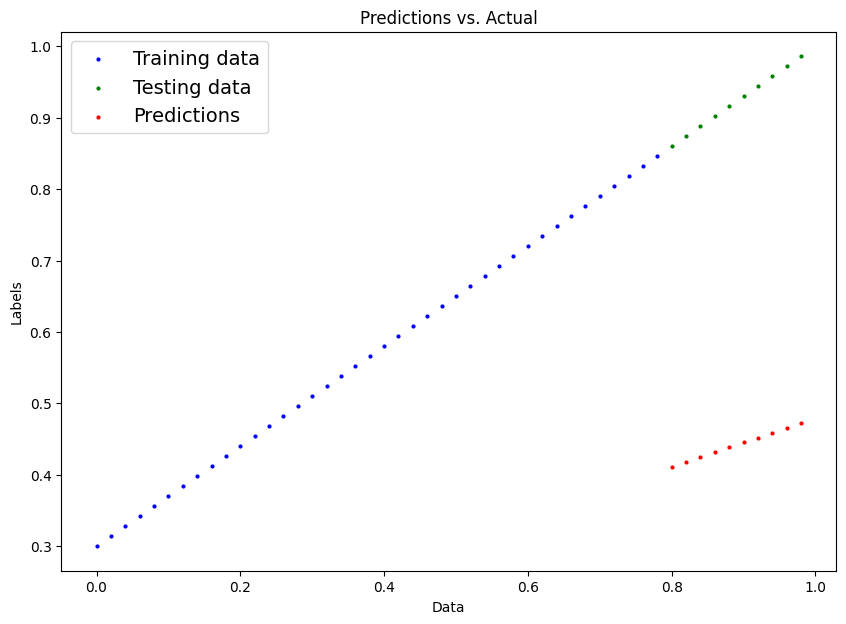

In [24]:
plot_predictions(predictions=y_preds_new);

In [25]:
torch.manual_seed(42)
epochs = 200 # 1 loop through the data

# Track key values
epoch_count = []
loss_values = []
test_loss_values = []

for epoch in range(epochs):
    model_0.train() # train mode in PyTorch sets all parameters to require gradients
    # Forward pass
    y_pred = model_0(X_train)
    # Calculate loss
    loss = loss_fn(y_pred, y_train) #  calculate the difference between the predictions and our trained values
    print(f'Loss: {loss}')
    # Optimizer zero grad - zero the gradients as they accumulate over time
    optimizer.zero_grad()
    # Loss backward- backpropagation
    loss.backward()
    # Optimizer step- gradient descent- we have to zero the optimizer changes as they go through the loop
    optimizer.step()
    # Testing
    model_0.eval() # put the model in evaluation mode- tuens off settings not needed for evaluation/testing (dropout/batchnorm layers)
    with torch.inference_mode(): # turns off gradient tracking
        with torch.no_grad():
            test_pred = model_0(X_test)
            test_loss = loss_fn(test_pred, y_test)
        print(f'Test loss: {test_loss}')
    # Print out model sate_dict()
    if epoch % 10 == 0:
        epoch_count.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss)
        print(f'\nEpoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}')



Loss: 0.3013603389263153
Test loss: 0.4675942063331604

Epoch: 0 | Loss: 0.3013603389263153 | Test Loss: 0.4675942063331604
Loss: 0.28983935713768005
Test loss: 0.4541231691837311
Loss: 0.2783183455467224
Test loss: 0.44065219163894653
Loss: 0.26679736375808716
Test loss: 0.4271811842918396
Loss: 0.2552763521671295
Test loss: 0.41371020674705505
Loss: 0.24375534057617188
Test loss: 0.40023916959762573
Loss: 0.23223432898521423
Test loss: 0.3867681920528412
Loss: 0.22071333229541779
Test loss: 0.37329721450805664
Loss: 0.20919232070446014
Test loss: 0.3598262071609497
Loss: 0.1976713240146637
Test loss: 0.3463551998138428
Loss: 0.18615034222602844
Test loss: 0.3328842222690582

Epoch: 10 | Loss: 0.18615034222602844 | Test Loss: 0.3328842222690582
Loss: 0.1746293306350708
Test loss: 0.3194132149219513
Loss: 0.16310831904411316
Test loss: 0.30594223737716675
Loss: 0.1515873372554779
Test loss: 0.2924712300300598
Loss: 0.14006635546684265
Test loss: 0.27900025248527527
Loss: 0.128545358777

## Now that we've run our model for 200 epochs, how close does it match up to our original weights and biases?

after 100 epochs our weight = 0.6193
bias = 0.3338

In [26]:
weight, bias

(0.7, 0.3)

In [27]:
with torch.inference_mode():
    y_preds_new = model_0(X_test)

y_preds_new

tensor([[0.8554],
        [0.8693],
        [0.8832],
        [0.8971],
        [0.9110],
        [0.9249],
        [0.9388],
        [0.9527],
        [0.9666],
        [0.9805]])

### Now we see our predictions are extremely accurate

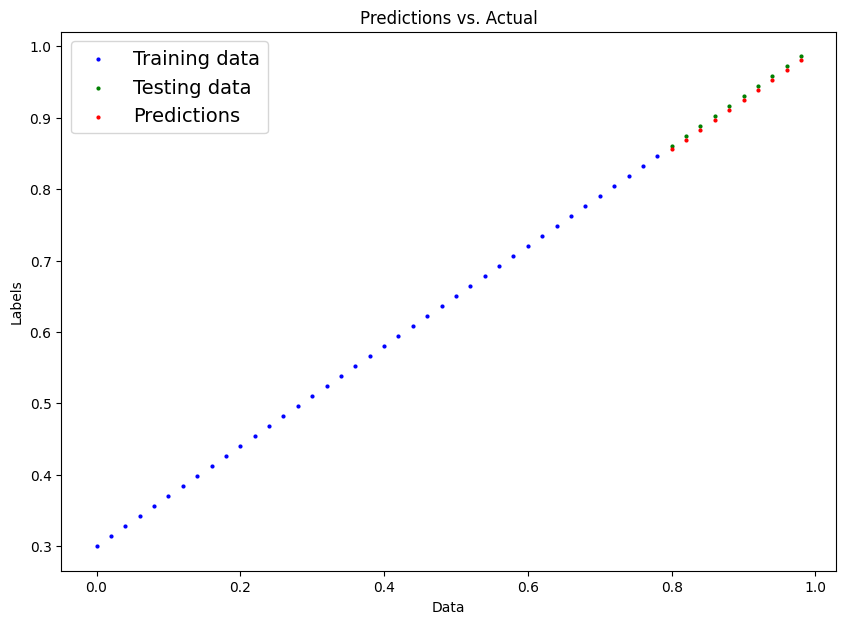

In [28]:
plot_predictions(predictions=y_preds_new);

### Plot loss curves
**remember** we have our data in the form of torch tensors. To plot we need to turn them back into numpy arrays

In [29]:
import numpy as np
np.array(torch.tensor(loss_values).numpy()), test_loss_values

(array([0.30136034, 0.18615034, 0.08227583, 0.05181945, 0.04503796,
        0.04132963, 0.03785244, 0.03441364, 0.03097964, 0.02754883,
        0.02411001, 0.02067771, 0.0172452 , 0.0138064 , 0.01037578,
        0.00694158, 0.00350277, 0.00258851, 0.00258851, 0.00258851],
       dtype=float32),
 [tensor(0.4676),
  tensor(0.3329),
  tensor(0.2070),
  tensor(0.1402),
  tensor(0.1118),
  tensor(0.0981),
  tensor(0.0878),
  tensor(0.0795),
  tensor(0.0719),
  tensor(0.0636),
  tensor(0.0554),
  tensor(0.0478),
  tensor(0.0395),
  tensor(0.0312),
  tensor(0.0236),
  tensor(0.0154),
  tensor(0.0071),
  tensor(0.0084),
  tensor(0.0084),
  tensor(0.0084)])

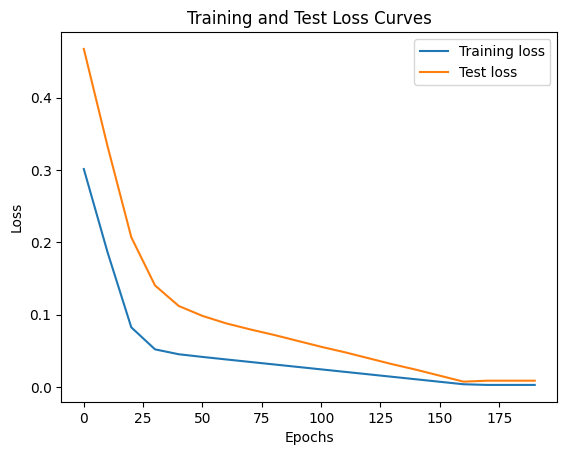

In [30]:
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label='Training loss')
plt.plot(epoch_count, test_loss_values, label='Test loss')
plt.title('Training and Test Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend();

## Saving a model in PyTorch

There are three main things to know about saving and loading models in PyTorch.

1. `torch.save()` - allows you to save a PyTorch object in Python's 'Pickle' format
2. `torch.load()` - allows you to load a saved PyTorch object
3. `torch.nn.Module.load_state_dict()` - allows you to load a model's saved state dictionary.

docs: https://pytorch.org/tutorials/beginner/saving_loading_models.html

In [31]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6951])), ('bias', tensor([0.2993]))])

In [32]:
# Saving model_0
from pathlib import Path

#Create model directory
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True, exist_ok=True) # if model already exists it won't throw error

# Create model save path
MODEL_NAME = '01_pytorch_workflow_model_0.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

MODEL_SAVE_PATH

# Save the model state_dict()- saving model for inference
print(f'Saving model to: {MODEL_SAVE_PATH}')
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_0.pth


### Loading a model

since we saved our model's `state_dict()` rather than our entire model, we'll create a new instance of our model and load the `state_dict()` into that

<u>*from docs:*</u>

```
model = TheModelClass(*args, **kwargs)
model.load_state_dict(torch.load(PATH, weights_only=True))
model.eval()
```
Also:

`torch.load(f, map_location=None, pickle_module=pickle, *, weights_only=False, mmap=None, **pickle_load_args)`

In [33]:
! ls -l models

total 4
-rw-r--r-- 1 root root 1680 Dec  4 00:26 01_pytorch_workflow_model_0.pth


In [34]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6951])), ('bias', tensor([0.2993]))])

#### To load in a saved `state_dict` we have to instantiate a new instance of our model class


In [35]:
loaded_model_0 = LinearRegression()

# Load the saved state_dict of model_0 (this will update the new instance with updated parameters)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


<ipython-input-35-86b298a3e296>:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


<All keys matched successfully>

In [36]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6951])), ('bias', tensor([0.2993]))])

#### With this model loaded we could even make some predictions

here we will employ:
1. `eval()` mode
2. `inference_mode()` to make the predictions

In [37]:
loaded_model_0.eval()
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8554],
        [0.8693],
        [0.8832],
        [0.8971],
        [0.9110],
        [0.9249],
        [0.9388],
        [0.9527],
        [0.9666],
        [0.9805]])

#### Compare with our loaded model predictions

In [38]:
y_preds == loaded_model_preds

tensor([[False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False]])

**This is unexpected!**
let's see what is going on

In [39]:
# Make some predictions with our loaded model
model_0.eval()
with torch.inference_mode():
    y_preds_new = model_0(X_test)

y_preds_new

tensor([[0.8554],
        [0.8693],
        [0.8832],
        [0.8971],
        [0.9110],
        [0.9249],
        [0.9388],
        [0.9527],
        [0.9666],
        [0.9805]])

In [40]:
y_preds_new == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

*Groovy*

### Let's go over what we have done

go over steps above and see it all in one place

In [41]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.5.1+cu121'

Create device agnostic code- as we could take advantage of GPU's for accelerated computation - in this case I will turn on a GPU (T4) and we will see 'cuda', else we would see 'cpu'

In [42]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [43]:
! nvidia-smi

Wed Dec  4 00:26:52 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off | 00000000:00:04.0 Off |                    0 |
| N/A   31C    P0              46W / 400W |      5MiB / 40960MiB |      0%      Default |
|                                         |                      |             Disabled |
+-----------------------------------------+----------------------+--

### Tesla T4 GPU Specifications

| **Feature**                     | **Details**                                                                 |
|----------------------------------|-----------------------------------------------------------------------------|
| **Architecture**                | NVIDIA Turing                                                             |
| **GPU Memory**                  | 16 GB GDDR6                                                               |
| **CUDA Cores**                  | 2560                                                                      |
| **Tensor Cores**                | 320                                                                       |
| **GPU Memory Bandwidth**        | 320 GB/s                                                                  |
| **Single-Precision (FP32)**     | 8.1 TFLOPS                                                                |
| **Mixed-Precision (FP16/INT8)** | 65 TFLOPS (Tensor operations)                                             |
| **INT4 Performance**            | 130 TOPS                                                                  |
| **Power Consumption**           | 70W                                                                       |
| **Form Factor**                 | Single-slot, low-profile PCIe                                             |
| **Use Cases**                   | Inference, deep learning, video processing, and virtual desktop workloads |


## Data

In [44]:
# we'll just generate a line
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1) #without unsqueeze, errors will pop-up
y = weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [45]:
# split data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

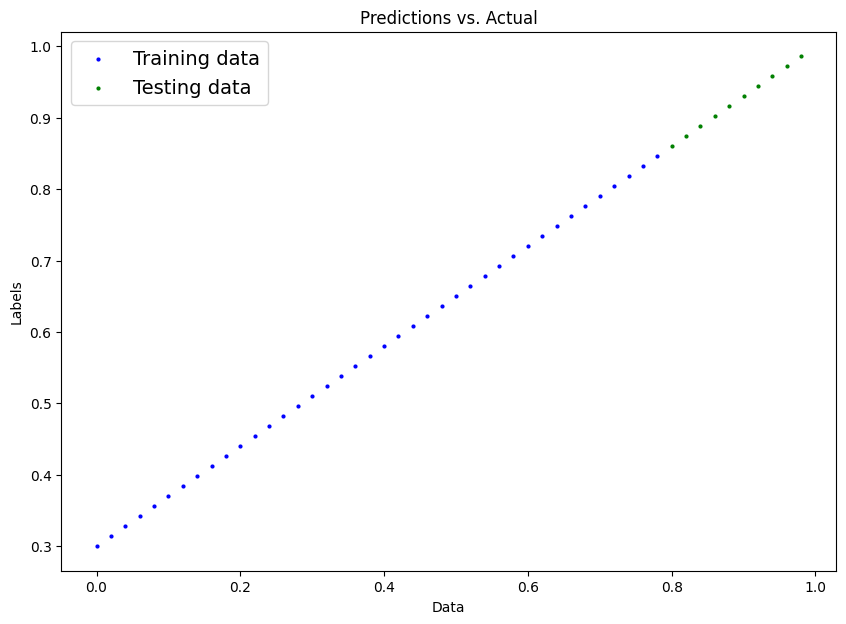

In [46]:
# plot the data
plot_predictions(X_train, y_train, X_test, y_test)

## Building a PyTorch Linear Model

In [47]:
# Create a linear model by subclassing nn.Module
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        # Use nn.Linear() for creating model paramters
        self.linear_layer = nn.Linear(in_features=1,
                                      out_features=1)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [48]:
X_train[:5], y_train[:5]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560]]))

device agnostoc code, will be cpu unless we use `to_device`

In [49]:
next(model_1.parameters()).device

device(type='cpu')

In [50]:
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

### Training

we need:
* Loss function
* Optimizer
* Training loop
* Testing loop

In [51]:
loss_fn = nn.L1Loss() #MAE
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.01)

In [52]:
# Training loop

torch.manual_seed(42)
epochs = 300

# Put data on target device
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
    model_1.train()
    # Forward pass
    y_pred = model_1(X_train)
    # calculate loss
    loss = loss_fn(y_pred, y_train)
    # Optimizer zero grad
    optimizer.zero_grad()
    # Loss backward
    loss.backward()
    # Optimizer step
    optimizer.step()
    # Testing
    model_1.eval()
    with torch.inference_mode():
        test_pred = model_1(X_test)
        test_loss = loss_fn(test_pred, y_test)

# Print out what is happening
    if epoch % 10 == 0:
        print(f'\nEpoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}')



Epoch: 0 | Loss: 0.5551779866218567 | Test Loss: 0.5739762187004089

Epoch: 10 | Loss: 0.439968079328537 | Test Loss: 0.4392664134502411

Epoch: 20 | Loss: 0.3247582018375397 | Test Loss: 0.30455657839775085

Epoch: 30 | Loss: 0.20954833924770355 | Test Loss: 0.16984669864177704

Epoch: 40 | Loss: 0.09433845430612564 | Test Loss: 0.03513690456748009

Epoch: 50 | Loss: 0.023886388167738914 | Test Loss: 0.04784907028079033

Epoch: 60 | Loss: 0.019956795498728752 | Test Loss: 0.045803118497133255

Epoch: 70 | Loss: 0.016517987474799156 | Test Loss: 0.037530567497015

Epoch: 80 | Loss: 0.013089174404740334 | Test Loss: 0.02994490973651409

Epoch: 90 | Loss: 0.009653178043663502 | Test Loss: 0.02167237363755703

Epoch: 100 | Loss: 0.006215683650225401 | Test Loss: 0.014086711220443249

Epoch: 110 | Loss: 0.00278724217787385 | Test Loss: 0.005814164876937866

Epoch: 120 | Loss: 0.0012645035749301314 | Test Loss: 0.013801801018416882

Epoch: 130 | Loss: 0.0012645035749301314 | Test Loss: 0.0

In [53]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [54]:
weight, bias

(0.7, 0.3)

## Making and evaluating predictions

In [55]:
# Put model into evaluation mode
model_1.eval()

# Make Predictions on the test data
with torch.inference_mode():
    y_pred = model_1(X_test)

y_pred

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]], device='cuda:0')

**Remember Matplotlib works with NumPy**

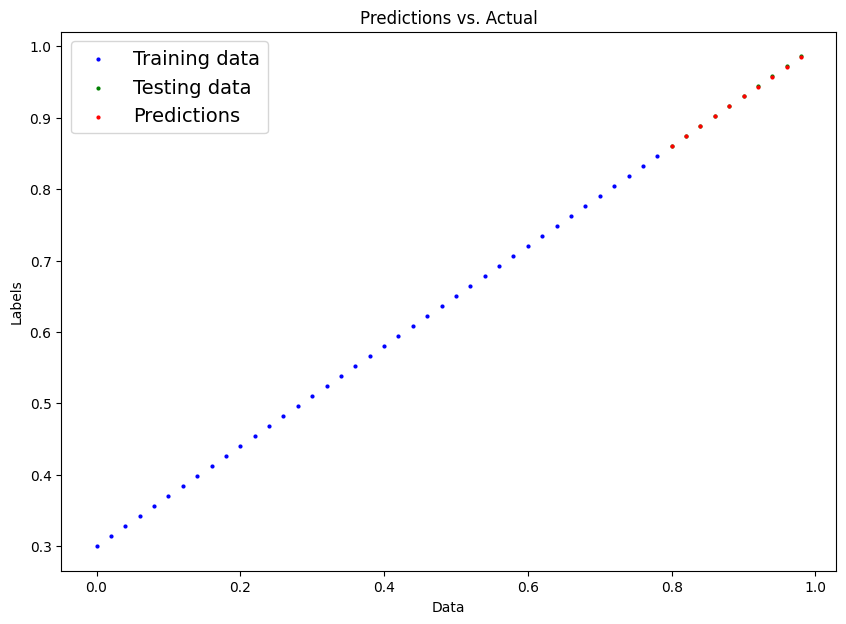

In [56]:
plot_predictions(predictions=y_pred.cpu())

#### Perfect result!!!!!

## Saving and Loading A Trained model

In [57]:
# Saving model_0
from pathlib import Path

#Create model directory
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True, exist_ok=True) # if model already exists it won't throw error

# Create model save path
MODEL_NAME = '01_pytorch_workflow_model_1.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

MODEL_SAVE_PATH

# Save the model state_dict()- saving model for inference
print(f'Saving model to: {MODEL_SAVE_PATH}')
torch.save(obj=model_1.state_dict(), f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_1.pth


In [60]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

### Load model_1

In [61]:
loaded_model_1 = LinearRegressionModelV2()

# Load the saved state_dict of model_1 (this will update the new instance with updated parameters)
loaded_model_1.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# Put the loaded model to device
loaded_model_1.to(device)


<ipython-input-61-1fcecca16bc3>:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_1.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [62]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
